## Exercício da Aula 6: Método da Bissecção e Falsa Posição 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Adicionais do exercício:
    - fazer também para falsa posição modificada
    - calcular o valor da velocidade quando o erro for igual ou menor que o especificado
    - comente os resultados

es = 0.0001%

In [2]:
def f(h):
    r = ((2*9.81)**0.5)*(h**0.5)*math.tanh((((2*9.81)**0.5)*(h**0.5)*2.5)/8) - 5
    return r

x_range = [0.0001*i for i in range(21000)]

def evaluate(range_for_evaluation, function):
    ordinate = []
    for i in range_for_evaluation:
        ordinate.append(function(i))
    return ordinate

p515 = evaluate(x_range, f)

## 1 - Solução gráfica:

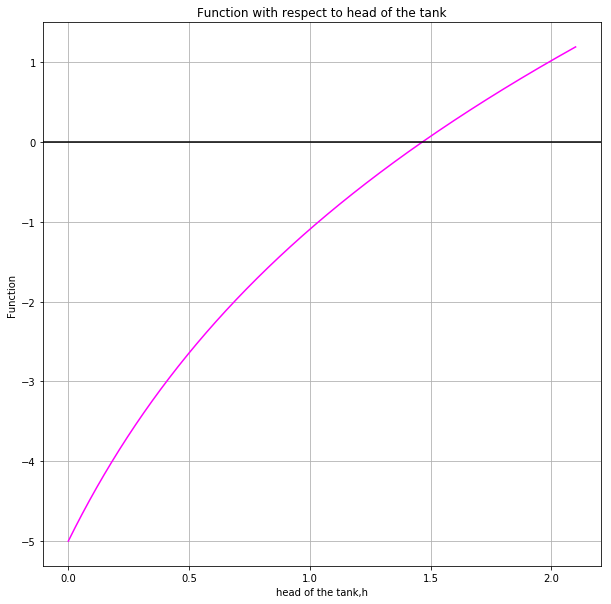

In [3]:
# FOR ZOOMING IN in the graph: plt.axis([xmin,xmax,ymin,ymax]) ----------- (zoom range)


def plot(x,y, title, xlabel, ylabel, zoom, zoom_range):
    a = 0
    plt.figure(figsize=(10,10)) #(I need to find a nice size)
    plt.plot(x,y, color='magenta')
    if zoom == True:
        plt.axis(zoom_range)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(y=0, color='k') #this makes the x axis appear
    plt.grid()
    plt.show()
    return a

problem_515 = plot(x_range, p515, "Function with respect to head of the tank", "head of the tank,h", "Function", False, [0,0,0,0])

## Zoom no gráfico:

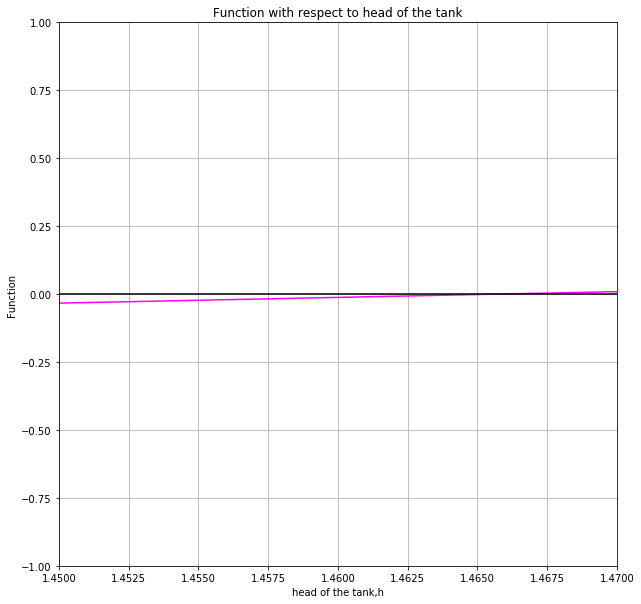

In [4]:
problem_515_zoom = plot(x_range, p515, "Function with respect to head of the tank", "head of the tank,h", "Function", True, [1.45,1.47,-1,1])

## Podemos verificar graficamente que a raiz da função é igual a h = 1.465

## 2 - Pelo método da bissecção:

In [5]:
x_lower = 0
x_upper = 2
error = 50
dummy_list = [2,50]
i = 1
while error > 0.0001:
    i+=1
    x_root = (x_lower+x_upper)/2
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)

velocidade = f(x_root) + 5

print(x_lower, x_upper, x_root, error,i,velocidade)

1.4658937454223633 1.4658946990966797 1.4658937454223633 6.505753362986557e-05 22 4.999998224263041


## Assim, pelo método da bissecção e para o erro pedido pelo professor (de 0.0001%), pudemos verificar que
## após 21 iterações, a raiz encontrada é 1.4658937454223633 e o erro é de 6.505753362986557e-05.
## Também, o valor da velocidade é igual a 4.999998224263041.

## 3 - Pelo método da falsa posição:

In [6]:
x_lower = 0
x_upper = 2
error = 50
dummy_list = [2,50]
i = 1
while error > 0.0001:
    i+=1
    #x_root = (x_lower+x_upper)/2
    x_root = x_upper - (f(x_upper)*(x_lower - x_upper))/(f(x_lower) - f(x_upper))
    product =  f(x_lower)* f(x_root)
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)
    
velocidade = f(x_root) + 5

print(x_lower, x_upper, x_root, error,i,velocidade)

0 1.4658953015101612 1.4658953015101612 7.853468169543548e-05 15 5.000001501871373


## Assim, pelo método da falsa posição e para o erro pedido pelo professor (de 0.0001%), pudemos verificar que
## após 14 iterações, a raiz encontrada é 1.4658953015101612 e o erro é de 7.853468169543548e-05.
## Também, o valor da velocidade é igual a 5.000001501871373.

## 4 - Pelo método da falsa posição modificada:

In [7]:
x_lower = 0
x_upper = 2
error = 50
dummy_list = [2,50]
i = 0
while error > 0.0001:
    i+=1
    l = [0,0,0]
    u = [0,0,0]
    #x_root = (x_lower+x_upper)/2
    
    fu = f(x_upper)
    fl = f(x_lower)
    
    if i > 2:
        if (l[2] == l[1]) and (l[1] == l[0]):
            fl = f(x_lower)/2
        if (u[2] == u[1]) and (u[1] == u[0]):
            fu = f(x_upper)/2
    
    x_root = x_upper - (fu*(x_lower - x_upper))/(fl - fu)
    
    product =  f(x_lower)*f(x_root)
    
    if product < 0:
        #the root lies in the lower subinterval
        x_upper = x_root
    if product > 0:
        #the root lies in the upper subinterval
        x_lower = x_root
    if product == 0:
        print(x_root)
        
    if i % 3 == 0:
        l[0] = x_lower
        u[0] = x_upper
    if i % 3 == 1:
        l[1] = x_lower
        u[1] = x_upper
    if i % 3 == 2:
        l[2] = x_lower
        u[2] = x_upper
    
    dummy_list.append(x_root)
    error = math.fabs(((x_root - dummy_list[i-1])/(x_root))*100)

velocidade = f(x_root) + 5
    
print(x_lower, x_upper, x_root, error,i,velocidade)

0 1.4658946927834982 1.4658946927834982 4.152594767365068e-05 16 5.000000219702594


## Assim, pelo método da falsa posição modificada e para o erro pedido pelo professor (de 0.0001%), pudemos verificar que
## após 15 iterações, a raiz encontrada é 1.4658946927834982 e o erro é de 4.152594767365068e-05.
## Também, o valor da velocidade é igual a 5.000000219702594.